## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate
import scipy.stats as stats
%matplotlib inline

## DNC: Begin Part 1: Descriptive Statistics 

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

### For 1-1

In [2]:
ru1 = np.random.uniform(25,35,10)
print('This is the numbers: ', ru1)
data1 = pd.DataFrame(ru1)
print('This is the DataFrame: ', data1)
npstd = np.std(ru1)
pdstd = pd.DataFrame.std(data1)
print('This is the output of np.std: ', npstd)
print('This is the output of pd.std: ', pdstd)


This is the numbers:  [31.12256173 33.0224867  28.69867426 28.72281083 26.61310028 26.88488282
 34.28212997 26.45511935 30.99441063 27.26599102]
This is the DataFrame:             0
0  31.122562
1  33.022487
2  28.698674
3  28.722811
4  26.613100
5  26.884883
6  34.282130
7  26.455119
8  30.994411
9  27.265991
This is the output of np.std:  2.659623364546472
This is the output of pd.std:  0    2.803489
dtype: float64


The difference between two std is because the the method is different, one is divided by n and the other is (n-1), then when calculate the standard deviation, there is a difference.

In [3]:
ru2 = np.random.uniform(25,35,1000000)
print('This is the numbers: ', ru2)
data2 = pd.DataFrame(ru2)
print('This is the DataFrame: ', data2)
npstd2 = np.std(ru2)
pdstd2 = pd.DataFrame.std(data2)
print('This is the output of np.std: ', npstd2)
print('This is the output of pd.std: ', pdstd2)


This is the numbers:  [26.45572814 30.04660895 31.05210461 ... 27.43560627 30.72073568
 27.63419038]
This is the DataFrame:                  0
0       26.455728
1       30.046609
2       31.052105
3       31.887150
4       26.049164
5       27.603627
6       26.777327
7       32.717153
8       34.628043
9       30.480941
10      26.645009
11      34.574096
12      34.354321
13      33.056014
14      30.628845
15      25.328400
16      27.676312
17      31.798654
18      32.152768
19      33.060973
20      30.064764
21      26.814390
22      34.651523
23      31.640867
24      26.523898
25      26.837525
26      29.512609
27      27.063448
28      26.925589
29      32.745039
...           ...
999970  33.972009
999971  28.945027
999972  32.532785
999973  31.432495
999974  32.452168
999975  32.312522
999976  27.245690
999977  29.072192
999978  29.341434
999979  28.598482
999980  31.052363
999981  26.627393
999982  31.297378
999983  34.541409
999984  26.858498
999985  30.416902
999986  30.

It's difference but really close. Because the number of the data is really huge, therefore it will infinite approach the theoretical standard deviation. but not the same.


In [4]:
ru3 = np.random.uniform(25,35,100) # Change the number from 1E6 to 100.
data3 = pd.DataFrame(ru3)
npstd3 = np.std(ru3,ddof=1) # by using "ddof=1" can make the 2 results the same.
print(float(npstd3))
pdstd3 = pd.DataFrame.std(data3)
print(float(pdstd3))


3.0338414141899537
3.0338414141899532


###  For 1-2

In [5]:
data1 = pd.read_csv('GerberdingElectricityChilledWater.csv')
data1.head()

,DateTime,Btu,kWh
0,1/1/13 0:15,49664.0,19.69
1,1/1/13 0:30,90112.0,20.84
2,1/1/13 0:45,19968.0,17.42
3,1/1/13 1:00,50176.0,19.59
4,1/1/13 1:15,99840.0,20.46


Text(0, 0.5, 'Btu')

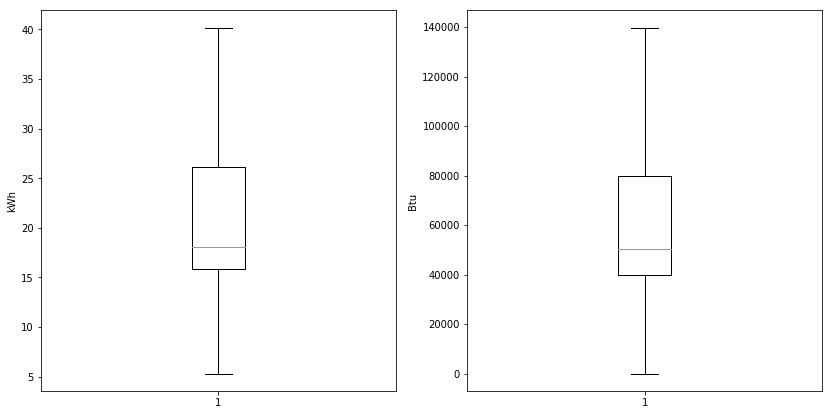

In [6]:
x1=data1['kWh']
x2=data1['Btu']
fig = plt.figure(figsize=(14,7))

ax1 = plt.subplot(1,2,1)
ax1.boxplot(x=x1, showfliers=False)
plt.ylabel('kWh')

ax2 = plt.subplot(1,2,2)
ax2.boxplot(x=x2, showfliers=False)
plt.ylabel('Btu')


* Using the subplot to create 2 diagrams. The left is 'kWh' and the right is 'Btu'. 
* Using ``showfliers=False`` to delete the abnormal data from the plot.
* The horizontal bottom line indicates that this is the minimum number and the line lies in the top means it's the maximum number.
* For the box, the yellow line is the median, and the upper line of the box means the 75% value of the data is lower than this number, and the lower line is 25%.

## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


#### For Btu

In [7]:
data1.shape
# To find how many data in the file

(49998, 3)

In [8]:
print('This is the Mean of Btu: ', data1['Btu'].mean())
print('This is the Mean of kWh: ', data1['kWh'].mean())
print('This is the Std of Btu: ', data1['Btu'].std())
print('This is the Std of kWh: ', data1['kWh'].std())

This is the Mean of Btu:  61428.009943279096
This is the Mean of kWh:  18.673827553061372
This is the Std of Btu:  33781.789676406275
This is the Std of kWh:  14.736762424483159


In [9]:
sample_Btu =  np.random.normal(data1['Btu'].mean(),data1['Btu'].std(),49998)
# create a normal distribution sample, which have the same amount of data with the file.

In [10]:
# Create a function in order to calculate the CDF
def cdf1(data, bins=100):
    hist_data, bin_edges = np.histogram(data, bins=100, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf]

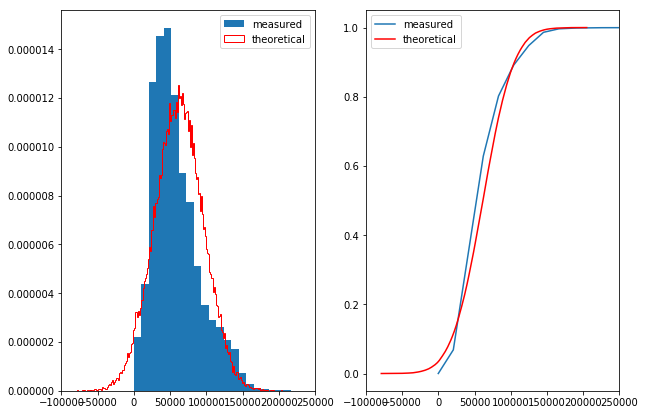

In [20]:
plt.figure(figsize=(10,7))
ax3 = plt.subplot(1,2,1)
plt.hist(data1['Btu'],bins=200,density=True,zorder=0,label='measured')
plt.hist(sample_Btu, bins=200,density=True,histtype='step',zorder=1,color='red',label='theoretical')
plt.xlim(-100000,250000)
plt.legend()

ax4 = plt.subplot(1,2,2)
[cdf] = cdf1(data1['Btu'],100)
x = np.linspace(np.min(data1['Btu']), np.max(data1['Btu']), num=49998)
plt.plot(x,cdf(x),zorder=0,label='measured')
[cdf] = cdf1(sample_Btu,100)
x = np.linspace(np.min(sample_Btu), np.max(sample_Btu), num=49998)
plt.plot(x,cdf(x),zorder=1,color='red',label='theoretical')
plt.xlim(-100000,250000)
plt.legend()
plt.show()

<font color='red'>
    Plot a Smooth curve of PDF

In [12]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

(-100000, 250000)

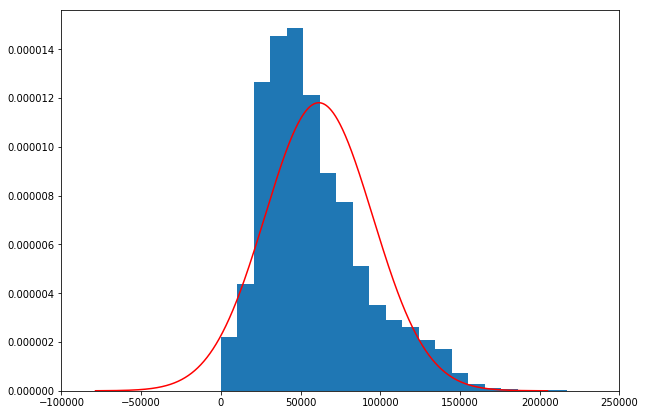

In [22]:
plt.figure(figsize=(10,7))

ax7 = plt.subplot(1,1,1)
plt.hist(data1['Btu'],bins=200,density=True,zorder=0,label='measured')
x7 = np.arange(sample_Btu.min(),sample_Btu.max(),1)
y7 = normfun(x7,data1['Btu'].mean(),data1['Btu'].std())
plt.plot(x7,y7,zorder=1,color='red')dd
plt.xlim(-100000,250000)


#### For kWh

In [18]:
sample_kWh = np.random.normal(data1['kWh'].mean(),data1['kWh'].std(),49998)

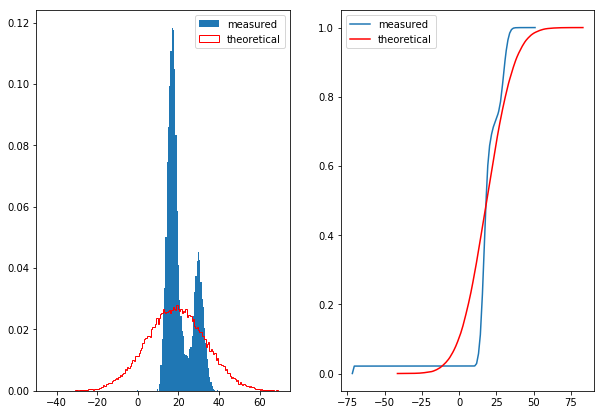

In [19]:
plt.figure(figsize=(10,7))
ax5 = plt.subplot(1,2,1)
plt.hist(data1['kWh'],bins=200,density=True,zorder=0,label='measured')
plt.hist(sample_kWh,bins=200,density=True,histtype='step',zorder=1,color='red',label='theoretical')
plt.xlim(-50,75)
plt.legend()

ax6 = plt.subplot(1,2,2)
[cdf] = cdf1(data1['kWh'],100)
x = np.linspace(np.min(data1['kWh']),np.max(data1['kWh']),num=49998)
plt.plot(x,cdf(x),zorder=0,label='measured')
[cdf] = cdf1(sample_kWh,100)
x = np.linspace(np.min(sample_kWh),np.max(sample_kWh),num=49998)
plt.plot(x,cdf(x),zorder=1,color='red',label='theoretical')
plt.legend()
plt.show()

In this section, I use ``np.random.normal``to create 2 samples, and draw the ``hist`` to show the relation between the data and the normal distribution sample. 

After draw the 4 figure, the 'Btu' is very close to normal distribution but the 'kWh' is not. 

And by reading the normal distribution diagram, we can easily tell the mean of the data, which is close to the mean we calculated before. 

<font color='blue'> For this section I have a question.   
    Do I need to use ``fit`` on the raw data and make it to a normal distribution?

## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

By calculating the P value, the equation is:
$$ t = \frac {|\bar{X}-\mu|}{S_{\bar{X}}}= \frac {\bar{X}-\mu}{S/\sqrt{n}}$$  
And the $\bar{X}$ is the mean of the sample, $S$ is the sandard deviation. In the P value hypothesis, if we set the P value at 0.05. And when the P we calculated is less than 0.05, which means the hypothesis is not very good and should be rejected. 

<font color='red'> Thus, make 3 hypothesies:  
    * The mean of the Lighting usage for UW students are approximately equal to the national average
    * The mean of the Electricity usage of UW students are approximately equal to the national average
    * The mean of the Totla usage of UW students are approximately euqual to the national average

In [24]:
data2 = pd.read_csv('energyuse.csv',skiprows=[7]) # get the data for the 6 students
print(data2)
data3 = pd.read_csv('energyuse.csv',skiprows=[1,2,3,4,5,6] ) # get the data for the national average
print(data3)

d2Lm = data2['Lighting'].mean()
d2Em = data2['Electricity'].mean()
d2Tm = data2['Total'].mean()

  Group  Lighting  Electricity  Total
0     A     0.451        1.270  1.721
1     B     1.033        1.769  2.801
2     C     0.410        1.629  2.040
3     D     0.708        1.633  2.341
4     E     2.317        0.725  3.042
5     F     1.601        0.634  2.235
          Group  Lighting  Electricity  Total
0  National Avg      1.76         1.28   3.04


In [25]:
for datasetA in [data2['Lighting'],data2['Electricity'],data2['Total']]:
    datasetB=[1.76,1.28,3.04]
    [t, p] = stats.ttest_ind(datasetA, datasetB)
    print(p)
# Have no idea why the number is different.

0.13908791311613236
0.14138099745210927
0.4792479641342755


In [26]:
for datasetA in [data2['Lighting']]:
    [t, p] = stats.ttest_1samp(datasetA, 1.76)
    print(p)

0.07816916049324209


In [27]:
for datasetB in [data2['Electricity']]:
    [t, p] = stats.ttest_1samp(datasetB, 1.28)
    print(p)

0.9874042445399441


In [28]:
for datasetC in [data2['Total']]:
    [t, p] = stats.ttest_1samp(datasetC, 3.04)
    print(p)

0.01919071796945489


Seperately calculate the P calue of each column against the national average. If the standard P is 0.05, the results show that the electricity usage of 6 UW students is close to the national average, but the 'Total' is not. And for the Lighting, it's very close to the P value, which means we cannot decide it's related of not. The hypothesis may need to reconsidered.  
<font color='red'>
Thus the first and second hypothesis are approved and the third one is rejected.    
    </font>

<font color = 'blue'> Again, I have questions. 
    I use the ``for``to calculate the data at once and the results are different. I don't know why...  
    Is it because the ``lsamp`` and ``ind`` are using different method to calculate the P value?

Thank you for your answer, I got it.